# **Problem Statement:**
*The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.*

# **Dataset description:**
**1. Age:** Person's age in years 

**2. Sex:** Gender of the person or insurance holder(Female or Male)

**3. BMI:** Body mass index. The ideal range according to height and weight is 18.5 to 24.9

**4. Children:** Number of dependents

**5. Smoker:** Whether the insurance holder smokes or not

**6. Region:** Residential area of the person

**7. Expenses:** Individual medical costs billed by health insurance

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [435]:
df = pd.read_csv("/content/insurance.csv")
print("the shape of the dataset is : ",df.shape, "\n")
print(df.head())

the shape of the dataset is :  (1338, 7) 

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


# ***Exploring the data***

In [436]:
## statistical information of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [437]:
df.describe(include="O").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Check for missing values**

In [439]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### **Observation 1:**

>Dataset containing 1338 records

> numerical features = age, bmi, children, expenses

> categorical features = sex, smoker, region

> there are no missing values present in the dataset




## **Check for duplicates**

In [440]:
df.duplicated().sum()

1

In [441]:
df.drop_duplicates(inplace = True)

## **Univariate Analysis**

In [442]:
data = df.copy()
data.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


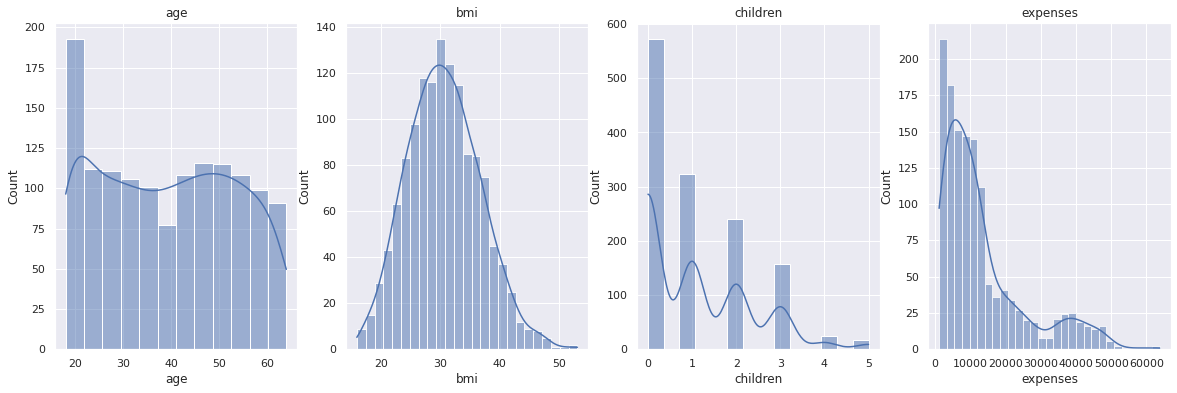

In [443]:
fig, axes = plt.subplots(1,4)   
axes = axes.flatten()        
fig.set_size_inches(20,6)
num_col = [col for col in data.columns if data[col].dtype!="O"]

for ax, col in zip(axes,num_col):
  sns.set_style("darkgrid", {"axes.facecolor": ".9"})
  sns.histplot(data[col], ax = ax,kde= True)
  ax.set_title(col)

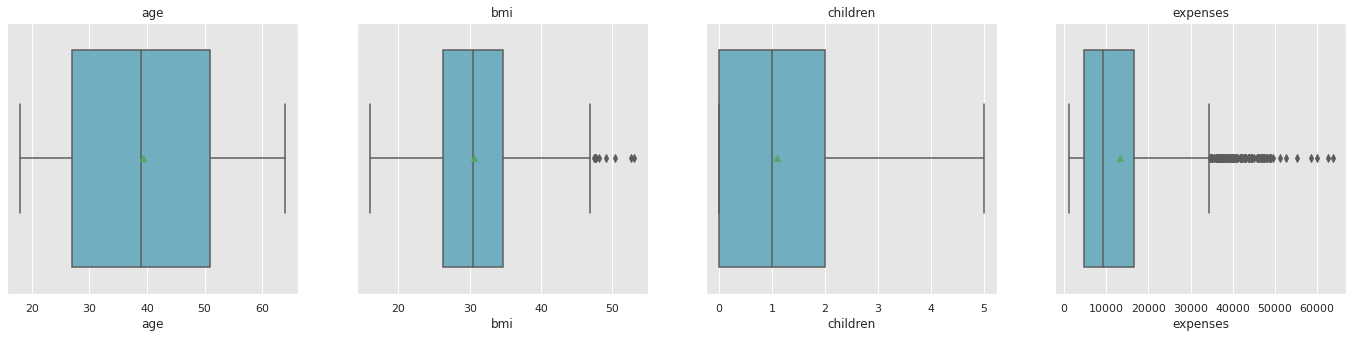

In [444]:
fig, axes = plt.subplots(1,4)   
axes = axes.flatten()        
fig.set_size_inches(24,5)
num_col = [col for col in data.columns if data[col].dtype!="O"]

for ax, col in zip(axes,num_col):
  sns.set_style("darkgrid", {"axes.facecolor": ".9"})
  sns.boxplot(data[col], ax = ax,showmeans=True,color= 'c')
  ax.set_title(col)

**Observation 2 :**

1. Age: It is following almost uniform distribution and it seems like there are more customers of age b/w 18 to 20

2. BMI : it is following normal distribution and approximately mean = 30. And there are few outliers present in this feature

3. Expenses: we can observe this variable is following power law distrubution and highly right skewed.  Also, for most customers, the annual medical expenses are under 10k. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.


### ***region, sex***

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64  /n/n


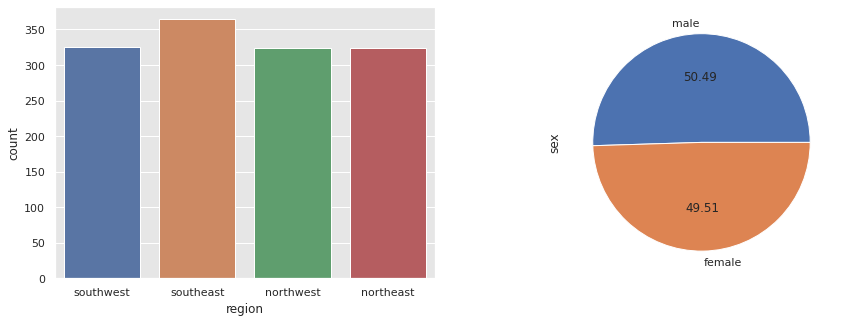

In [445]:
print(data["region"].value_counts(),' /n/n')

fig, axes = plt.subplots(1,2)   
axes = axes.flatten()        
fig.set_size_inches(15,5)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.countplot(ax= axes[0], data = data, x="region")
data["sex"].value_counts().plot(kind='pie',autopct= "%.2f")

observation 3:

> the dataset is having almost same no.of males and females

> Also, the no.of customers per region are almost same

### ***smoker vs sex***

no     1063
yes     274
Name: smoker, dtype: int64


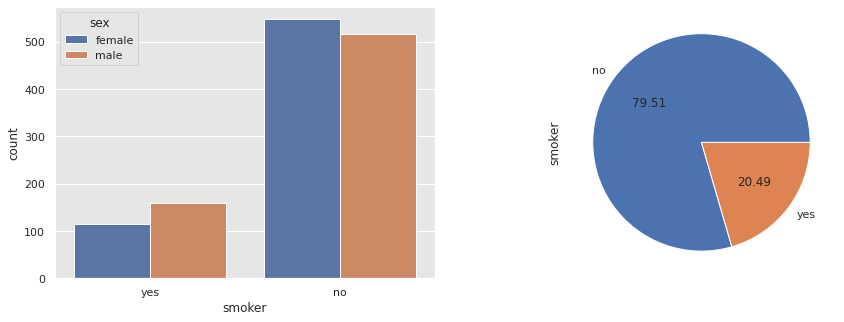

In [446]:
print(data["smoker"].value_counts())

fig, axes = plt.subplots(1,2)   
axes = axes.flatten()        
fig.set_size_inches(15,5)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.countplot(ax= axes[0], data = data, x="smoker",hue= 'sex')
data["smoker"].value_counts().plot(kind='pie',autopct= "%.2f")

### ***observation 4:***

It shows that only 20% of the customers are having smoking habit.

We can also see that smoking appears a more common habit among males.


## **Bi-variate analysis**

## ***expenses vs numerical features***

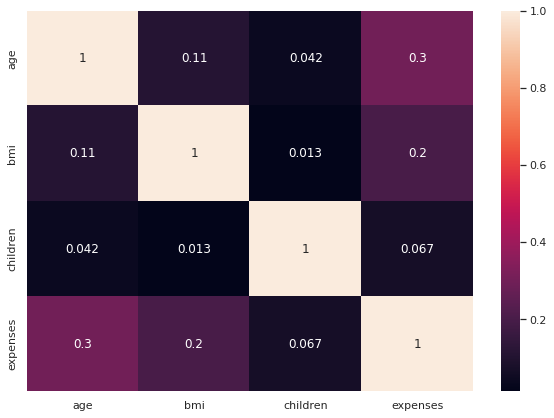

In [447]:
plt.figure(figsize= (10,7))
corr = data.corr()
ax = sns.heatmap(corr,annot=True)

> we can see age and bmi are having more correlation to expenses

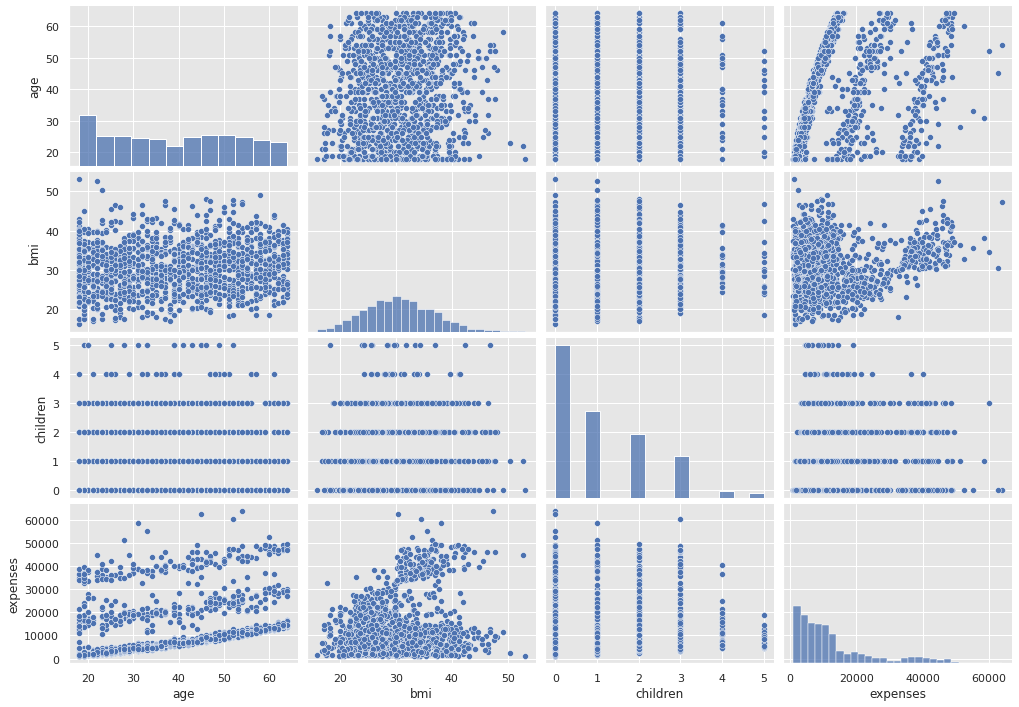

In [448]:
figure = sns.pairplot(data)
figure.fig.set_size_inches(15,10)

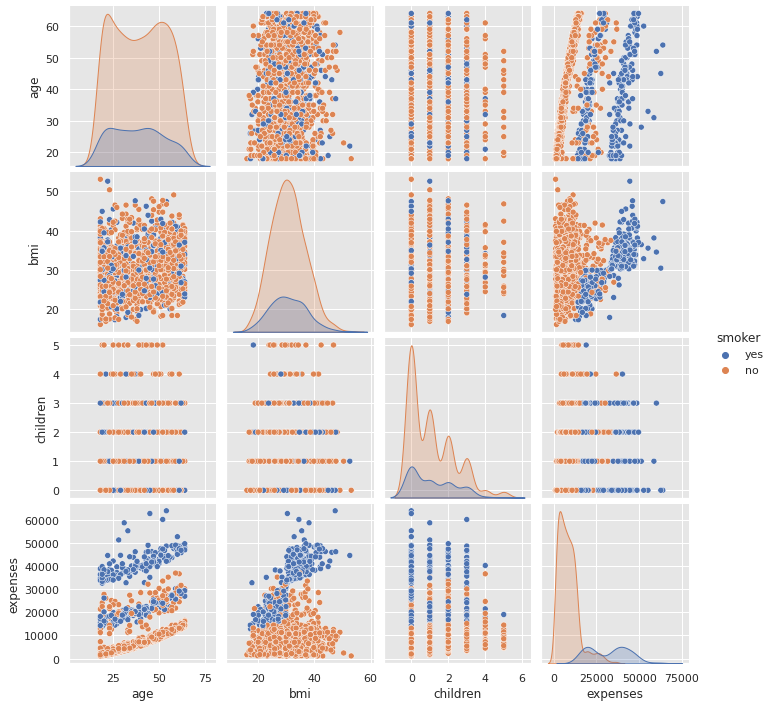

In [449]:

sns.pairplot(data,hue = 'smoker')


### **Bmi vs Expenses w.r.t smoker**

Text(0.5, 1.0, 'age vs expenses')

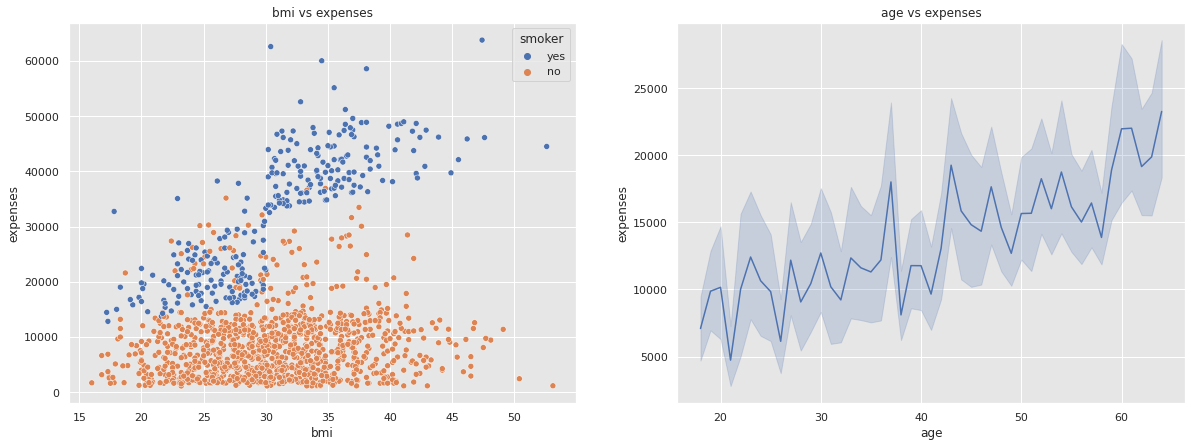

In [450]:
fig, axes = plt.subplots(1,2)   
axes = axes.flatten()        
fig.set_size_inches(20,7)
sns.scatterplot(df["bmi"],data["expenses"],ax=axes[0],hue=data["smoker"])
axes[0].set_title("bmi vs expenses")
sns.lineplot(data["age"],data["expenses"],ax=axes[1])
axes[1].set_title("age vs expenses")

observation :

1. we can observe here that person who has more bmi and also having smoking habit is paying more expenses

2. And the person with lesser are having less expenses when compared to person with more age

In [451]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

### **categorical_features vs expenses**

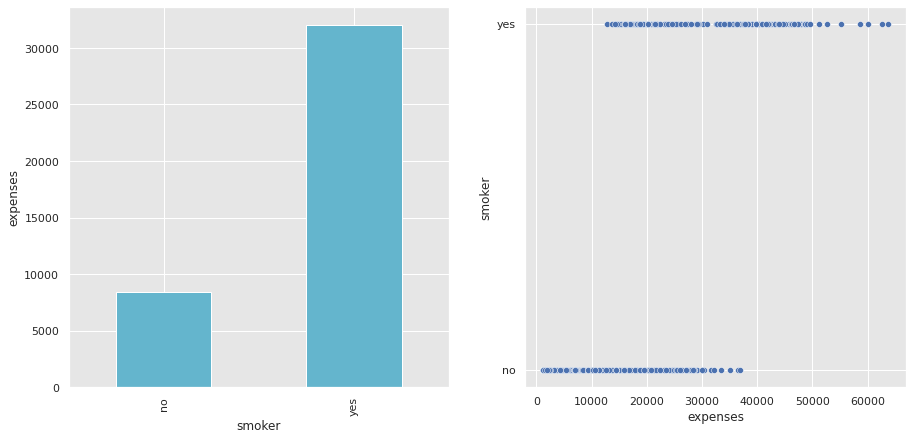

In [452]:
fig, ax =plt.subplots(1,2)
ax = ax.flatten()
fig.set_size_inches(15,7)

data.groupby("smoker")['expenses'].mean().plot(ax= ax[0],ylabel="expenses", kind= 'bar',color='c')
sns.scatterplot(data["expenses"],data["smoker"],ax = ax[1])

observation:

> we can see here that when a customer is having smoking habit, the expenses are high

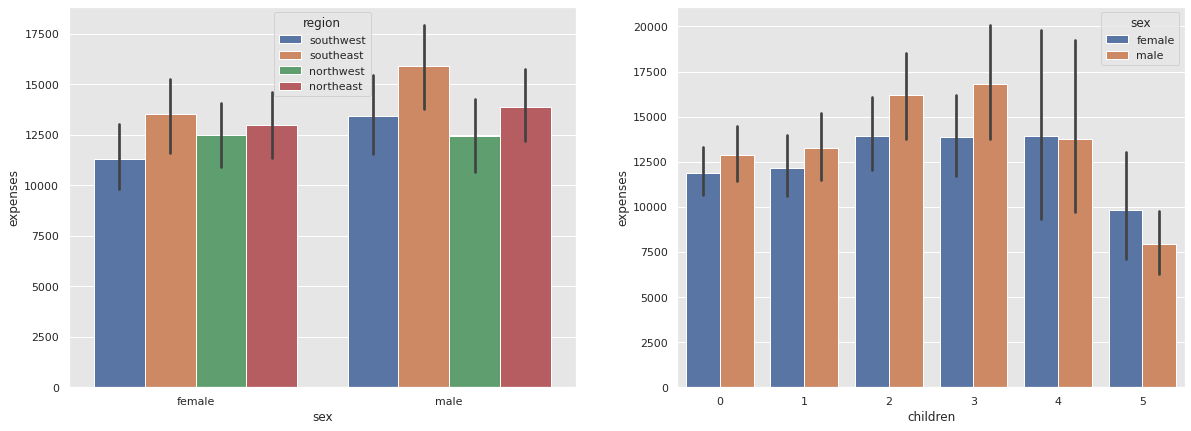

In [453]:
fig, ax =plt.subplots(1,2)
ax = ax.flatten()
fig.set_size_inches(20,7)

sns.barplot(x = "sex", y = "expenses",hue='region', data = data,ax = ax[0])
sns.barplot(x = "children", y = "expenses",hue='sex', data = data, ax= ax[1])


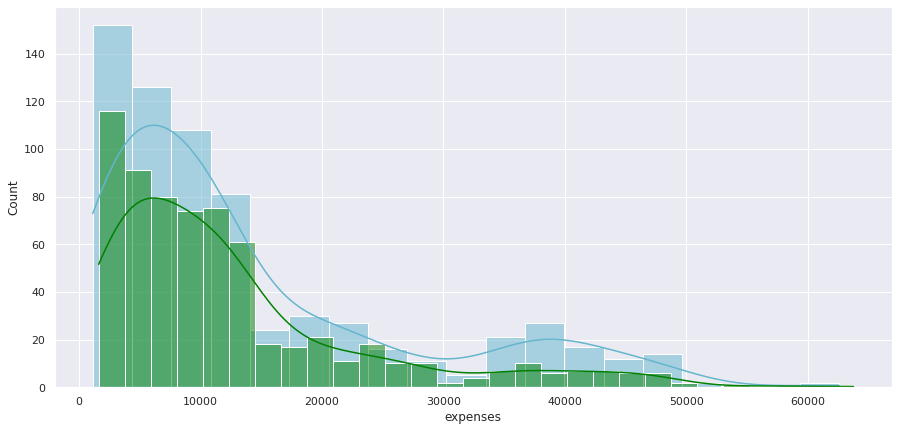

In [454]:
male = data[data["sex"]=='male']
female = data[data["sex"]=='female']

sns.set(rc = {'figure.figsize':(15,7)})
sns.histplot(male['expenses'],color= 'c',kde= True)
sns.histplot(female['expenses'],color= 'green',kde=True)



> we can observe a significant changes in the expenses between male and female customers and also the expense of male customer is high in most of the data

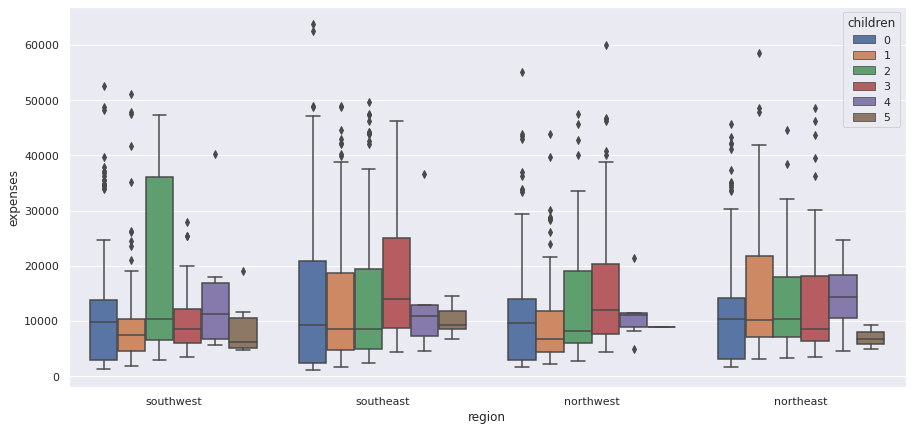

In [455]:
sns.boxplot(x='region',y='expenses',hue = 'children',data=data)

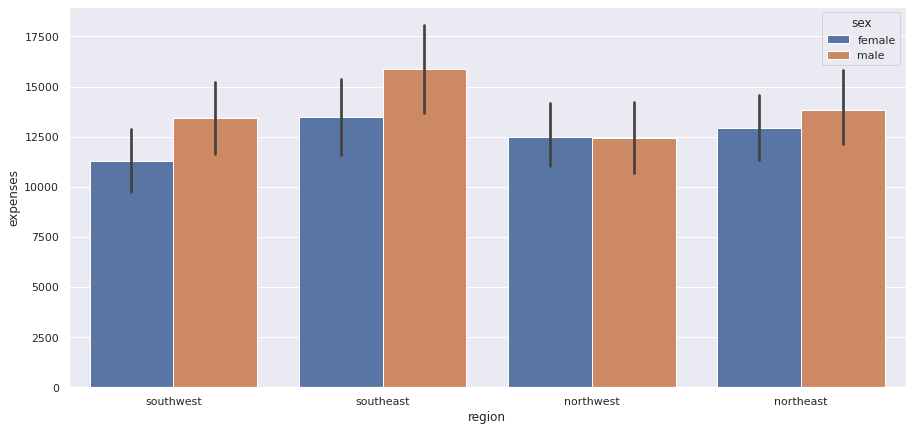

In [456]:
sns.barplot(x = "region", y = "expenses",hue='sex', data = df)

## **Handling outlier in bmi**

In [457]:
## this function perform imputaion with the mean of the variable where outliers are present

def detect_outlier(df,variable_name):
  outliers = []
  q1 = data["bmi"].quantile(0.25)
  q3 =data["bmi"].quantile(0.75)

  iqr = q3 - q1
  upper_fence = q3+ 1.5*iqr
  lower_fence = q1 - 1.5*iqr
  variable_mean = np.mean(df[variable_name])

  df[variable_name] = df[variable_name].apply(lambda x: variable_mean if(x<lower_fence or x>upper_fence) else x)
  return df
  

Text(0.5, 1.0, 'after imputing outliers')

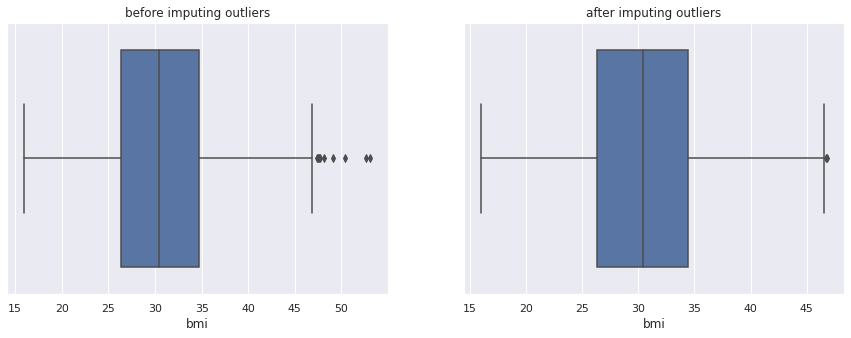

In [465]:
fig, ax =plt.subplots(1,2)
ax = ax.flatten()
fig.set_size_inches(15,5)

sns.boxplot(data["bmi"],ax = ax[0])
ax[0].set_title("before imputing outliers")
data = detect_outlier(data,'bmi')
sns.boxplot(data["bmi"],ax = ax[1])
ax[1].set_title("after imputing outliers")


In [467]:
x,y = data.drop(columns = ["expenses"]), data['expenses']
print(x.shape)
print(y.shape)

(1337, 6)
(1337,)


In [470]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [473]:
cat_col=[]
num_col = []
for col in x.columns:
  if x[col].dtype=="O":
    cat_col.append(col)
  else:
    num_col.append(col)

print(cat_col)
print(num_col)
  


['sex', 'smoker', 'region']
['age', 'bmi', 'children']


In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',,['']),
    ('tnf2',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),['sex','smoker','region'])
],remainder='passthrough')